<a href="https://colab.research.google.com/github/AJBrownson/crop-yield-colab/blob/dev/CassavaSynthetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sdv pandas numpy

In [2]:
import pandas as pd
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

data = pd.read_csv('CASSAVA.csv')
metadata = Metadata.detect_from_dataframe(data)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)
synthetic_data = synthesizer.sample(num_rows=1000)

# Save to CSV
synthetic_data.to_csv('CASSAVA_synthetic.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [1]:
import pandas as pd

# --- Load Cassava Base Dataset ---
cassava_df = pd.read_csv('CASSAVA.csv')

# --- Load and Parse Environmental TXT Files ---

# Load Min Temp
min_temp_df = pd.read_csv('Min_tempt.txt', delim_whitespace=True)
min_temp_df = min_temp_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'MinTemp'})

# Load Max Temp
max_temp_df = pd.read_csv('Max_tempt.txt', delim_whitespace=True)
max_temp_df = max_temp_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'MaxTemp'})

# Load Rainfall
rain_df = pd.read_csv('Rainfall.txt', delim_whitespace=True)
rain_df = rain_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'Rainfall'})

# --- Merge All on 'Year' ---
merged_df = cassava_df.merge(min_temp_df, on='Year') \
                      .merge(max_temp_df, on='Year') \
                      .merge(rain_df, on='Year')

# ✅ View Final Enriched Dataset
print(merged_df.head())

# Save to CSV
# merged_df.to_csv('CASSAVA_enriched.csv', index=False)


   Year  PRODUCTION   AREA   YIELD  MinTemp  MaxTemp  Rainfall
0  1991      1106.2  81.34  13.599    14.32    33.87      4.34
1  1992      1207.6  82.26  14.680    12.16    34.68      4.58
2  1993      1310.2  87.37  14.995    14.18    32.92      5.14
3  1994      1304.7  83.49  15.550    14.53    32.65      5.37
4  1995      1354.3  81.54  16.609    15.92    32.33      6.21


<ipython-input-1-f14055169a40>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  min_temp_df = pd.read_csv('Min_tempt.txt', delim_whitespace=True)
<ipython-input-1-f14055169a40>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  max_temp_df = pd.read_csv('Max_tempt.txt', delim_whitespace=True)
<ipython-input-1-f14055169a40>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rain_df = pd.read_csv('Rainfall.txt', delim_whitespace=True)


In [1]:
import pandas as pd

# --- Load Cassava Base Dataset ---
cassava_df = pd.read_csv('CASSAVA.csv')

# --- Load and Parse Environmental TXT Files ---

# Load Min Temp
min_temp_df = pd.read_csv('Min_tempt.txt', delim_whitespace=True)
min_temp_df = min_temp_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'MinTemp'})

# Load Max Temp
max_temp_df = pd.read_csv('Max_tempt.txt', delim_whitespace=True)
max_temp_df = max_temp_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'MaxTemp'})

# Load Rainfall
rain_df = pd.read_csv('Rainfall.txt', delim_whitespace=True)
rain_df = rain_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'Rainfall'})

# --- Merge Environmental Data with Cassava ---
cassava_df = cassava_df.merge(min_temp_df, on='Year') \
                       .merge(max_temp_df, on='Year') \
                       .merge(rain_df, on='Year')

cassava_df['Crop'] = 'Cassava'

# --- Load and Prepare Cocoa Dataset ---
cocoa_df = pd.read_excel('COCOA DATA.xlsx')  # Adjust sheet name if necessary
cocoa_df = cocoa_df.rename(columns=str.upper)  # Standardize column names
cocoa_df = cocoa_df[['YEAR', 'PRODUCTION', 'AREA', 'YIELD']] \
                   .rename(columns={'YEAR': 'Year'})

# Merge environmental data with Cocoa
cocoa_df = cocoa_df.merge(min_temp_df, on='Year') \
                   .merge(max_temp_df, on='Year') \
                   .merge(rain_df, on='Year')

cocoa_df['Crop'] = 'Cocoa'

# --- Combine Cassava and Cocoa Datasets ---
combined_df = pd.concat([cassava_df, cocoa_df], ignore_index=True)

# ✅ View Final Dataset
print(combined_df.head())

# Save to CSV
combined_df.to_csv('Cassava_Cocoa_Combined.csv', index=False)

<ipython-input-1-5c411c4267a1>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  min_temp_df = pd.read_csv('Min_tempt.txt', delim_whitespace=True)
<ipython-input-1-5c411c4267a1>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  max_temp_df = pd.read_csv('Max_tempt.txt', delim_whitespace=True)
<ipython-input-1-5c411c4267a1>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rain_df = pd.read_csv('Rainfall.txt', delim_whitespace=True)


   Year  PRODUCTION   AREA   YIELD  MinTemp  MaxTemp  Rainfall     Crop
0  1991      1106.2  81.34  13.599    14.32    33.87      4.34  Cassava
1  1992      1207.6  82.26  14.680    12.16    34.68      4.58  Cassava
2  1993      1310.2  87.37  14.995    14.18    32.92      5.14  Cassava
3  1994      1304.7  83.49  15.550    14.53    32.65      5.37  Cassava
4  1995      1354.3  81.54  16.609    15.92    32.33      6.21  Cassava


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sdv.metadata import Metadata
from sdv.single_table import GaussianCopulaSynthesizer

# Load Cassava Dataset
cassava_df = pd.read_csv('CASSAVA.csv')

# Load Environmental Data
min_temp_df = pd.read_csv('Min_tempt.txt', delim_whitespace=True)
min_temp_df = min_temp_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'MinTemp'})

max_temp_df = pd.read_csv('Max_tempt.txt', delim_whitespace=True)
max_temp_df = max_temp_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'MaxTemp'})

rain_df = pd.read_csv('Rainfall.txt', delim_whitespace=True)
rain_df = rain_df[['YEAR', 'ANN']].rename(columns={'YEAR': 'Year', 'ANN': 'Rainfall'})

# Merge with Cassava
cassava_df = cassava_df.merge(min_temp_df, on='Year') \
                       .merge(max_temp_df, on='Year') \
                       .merge(rain_df, on='Year')
cassava_df['Crop'] = 'Cassava'

# Load and Merge Cocoa Dataset
cocoa_df = pd.read_excel('COCOA DATA.xlsx')  # Upload this to Colab
cocoa_df = cocoa_df.rename(columns=str.upper)
cocoa_df = cocoa_df[['YEAR', 'PRODUCTION', 'AREA', 'YIELD']] \
                   .rename(columns={'YEAR': 'Year'})
cocoa_df = cocoa_df.merge(min_temp_df, on='Year') \
                   .merge(max_temp_df, on='Year') \
                   .merge(rain_df, on='Year')
cocoa_df['Crop'] = 'Cocoa'

# Combine Cassava + Cocoa
combined_df = pd.concat([cassava_df, cocoa_df], ignore_index=True)

# Train SDV Model (without 'Year')
train_df = combined_df.drop(columns=['Year'])

# Create metadata
metadata = Metadata.detect_from_dataframe(train_df)

# Initialize and train synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(train_df)

# Generate 1000 synthetic rows
synthetic_df = synthesizer.sample(num_rows=1000)

# Add Year back (1991–2000 repeated 100×)
synthetic_df['Year'] = list(range(1991, 2001)) * 100

# View and Save
print(synthetic_df.head())
synthetic_df.to_csv('Synthetic_Combined_Data.csv', index=False)

# (Optional) Download the file
from google.colab import files
files.download('Synthetic_Combined_Data.csv')

<ipython-input-1-e198cd35c4bf>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  min_temp_df = pd.read_csv('Min_tempt.txt', delim_whitespace=True)
<ipython-input-1-e198cd35c4bf>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  max_temp_df = pd.read_csv('Max_tempt.txt', delim_whitespace=True)
<ipython-input-1-e198cd35c4bf>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rain_df = pd.read_csv('Rainfall.txt', delim_whitespace=True)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


   PRODUCTION     AREA    YIELD  MinTemp  MaxTemp  Rainfall     Crop  Year
0    1912.779  111.146  22.6051    14.80    33.71      3.86  Cassava  1991
1     268.152   81.920   4.5964    13.24    32.57      4.86    Cocoa  1992
2     219.641  244.120   2.8172    15.73    33.14      4.30    Cocoa  1993
3     172.733   85.231  12.9739    13.52    32.12      2.86    Cocoa  1994
4    3028.075  348.017   8.3298    15.17    32.08      5.32    Cocoa  1995


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ MAE: 6.10
✅ RMSE: 7.75
✅ R²: 0.48


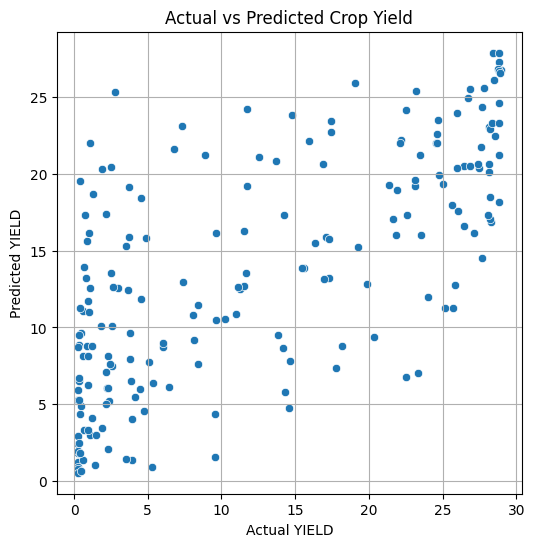

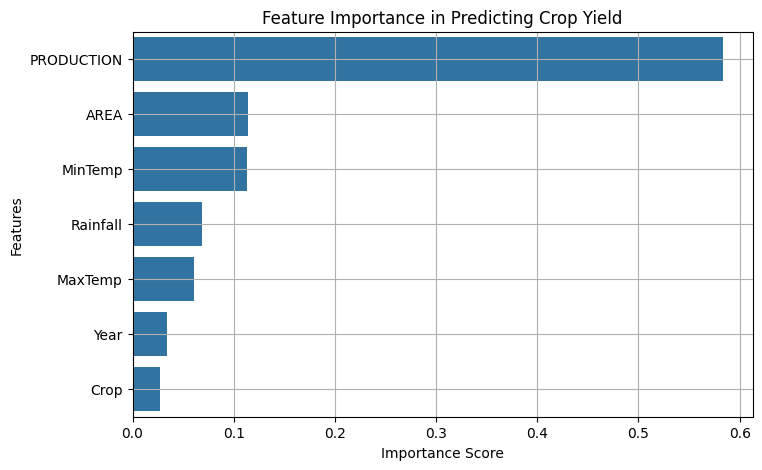

In [1]:
# Install required packages
!pip install scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your synthetic dataset
df = pd.read_csv('Synthetic_Combined_Data.csv')

# Encode categorical column ('Crop')
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])  # Cassava = 0, Cocoa = 1

# Define features and target
X = df.drop(columns=['YIELD'])  # all features
y = df['YIELD']                 # target: crop yield

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual YIELD")
plt.ylabel("Predicted YIELD")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance in Predicting Crop Yield")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()